### pangaeapy

This module allows to download and analyse metadata as well as data from tabular PANGAEA (https://www.pangaea.de) datasets.

https://github.com/pangaea-data-publisher/pangaeapy

In [1]:
import pangaeapy.src.pandataset as pandataset

In [2]:
# You want data from https://doi.pangaea.de/10.1594/PANGAEA.912222

ds= pandataset.PanDataSet(912222)
print(ds.title)
print(ds.year)
for a in ds.authors: 
    print(a.fullname)

Seawater carbonate chemistry and coral calcification
2020
Gómez Batista, Miguel
Metian, Marc
Oberhänsli, F
Pouil, Simon
Tambutté, Eric
Gattuso, Jean-Pierre
Hernández, Carlos M Alonso
Gazeau, Frédéric


/home/brock/.local/lib/python3.8/site-packages/pangaeapy/src/pandataset.py:407: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  self.setData(addQC=addQC)


In [3]:
ds.data.head()

,Type,Species,Reg spec no,URL ref,Exp,Type_2,Type_3,Treat,ID,Date/time start,...,[HCO3]-_2,[HCO3]- std dev_2,[CO3]2-_2,[CO3]2- std dev_2,DIC_2,DIC std dev_2,Omega Arg_2,Omega Arg std dev_2,Omega Cal_2,Omega Cal std dev_2
0,laboratory,Stylophora pistillata (coral),206982,http://www.marinespecies.org/aphia.php?p=taxde...,IC-LIGHT-45Ca,Exp,45Ca,Ambient pH / Light,1,2017-08-23T08:15,...,1634.05,14.59,224.22,6.81,1868.31,8.30,3.36,0.19,5.08,0.28
1,laboratory,Stylophora pistillata (coral),206982,http://www.marinespecies.org/aphia.php?p=taxde...,IC-LIGHT-45Ca,Exp,45Ca,Ambient pH / Light,2,2017-08-23T08:15,...,1613.23,14.42,221.79,6.74,1844.93,8.19,3.32,0.18,5.02,0.28
2,laboratory,Stylophora pistillata (coral),206982,http://www.marinespecies.org/aphia.php?p=taxde...,IC-LIGHT-45Ca,Exp,45Ca,Ambient pH / Light,3,2017-08-23T08:15,...,1587.60,15.49,244.90,7.24,1841.19,8.76,3.66,0.20,5.54,0.30
3,laboratory,Stylophora pistillata (coral),206982,http://www.marinespecies.org/aphia.php?p=taxde...,IC-LIGHT-45Ca,Exp,45Ca,Ambient pH / Light,4,2017-08-23T08:15,...,1647.49,13.91,210.56,6.50,1868.91,7.90,3.16,0.18,4.77,0.26
4,laboratory,Stylophora pistillata (coral),206982,http://www.marinespecies.org/aphia.php?p=taxde...,IC-LIGHT-45Ca,Exp,45Ca,Ambient pH / Light,5,2017-08-23T08:15,...,1584.54,14.16,217.42,6.60,1811.70,8.05,3.26,0.18,4.92,0.27


In [4]:
ds.data.columns

Index(['Type', 'Species', 'Reg spec no', 'URL ref', 'Exp', 'Type_2', 'Type_3',
       'Treat', 'ID', 'Date/time start', 'Date/time end', 'Inc dur', 'Size',
       'Mass', 'Mass_2', 'Dry m', 'Mass_3', 'Mass_4', 'Mass_5', 'Mass_6',
       'Sal', 'Sal_2', 'pH', 'pH_2', 'AT', 'AT std dev', 'AT_2',
       'AT std dev_2', 'Ca2+', 'Ca2+ std dev', 'Ca2+_2', 'Ca2+ std dev_2',
       '45Ca', '45Ca_2', '45Ca_3', '45Ca std dev', 'δ13C', 'δ13C_2',
       'δ13C std dev', 'δ13C_3', 'δ13C_4', 'Calc rate CaCO3',
       'Calc rate std e', 'Calc rate CaCO3_2', 'Calc rate std e_2',
       'Calc rate CaCO3_3', 'Calc rate std e_3', 'Calc rate CaCO3_4',
       'Calc rate std e_4', 'Temp', 'Temp std dev', 'CSC flag', 'CO2',
       'CO2 std dev', 'fCO2water_SST_wet', 'fCO2 std dev', 'pCO2water_SST_wet',
       'pCO2 std dev', '[HCO3]-', '[HCO3]- std dev', '[CO3]2-',
       '[CO3]2- std dev', 'DIC', 'DIC std dev', 'Omega Arg',
       'Omega Arg std dev', 'Omega Cal', 'Omega Cal std dev', 'CO2_2',
       'CO2 st

<AxesSubplot:xlabel='Date/time start'>

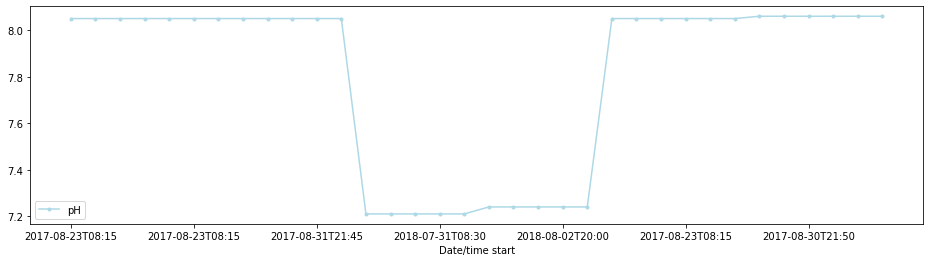

In [5]:
ds.data.plot(x='Date/time start', y='pH', c='lightblue', marker='.', figsize=[16,4])

In [6]:
ds.data['CSC flag'].unique()

array([8])

In [7]:
import json
import urllib
import pandas as pd

In [8]:
# Extract all articles (citation_date and keyword included)

url = 'http://ws.pangaea.de/es/dataportal-oa-icc/pansimple/_search?size=2000&_source_include=citation_date,keyword'

jsonurl = urllib.request.urlopen(url)
jsonread = json.loads(jsonurl.read())
jsonurl.close()

In [9]:
# Transform the resulting json to a pandas dataframe

df = pd.DataFrame.from_dict(jsonread['hits']['hits'])
df

,_index,_type,_id,_score,_source
0,portals_v2,pansimple,PANGAEA.884674,1.0,"{'citation_date': '2018-01-09', 'keyword': ['A..."
1,portals_v2,pansimple,PANGAEA.779703,1.0,"{'citation_date': '2011-04-21', 'keyword': ['B..."
2,portals_v2,pansimple,PANGAEA.891075,1.0,"{'citation_date': '2018-06-15', 'keyword': ['A..."
3,portals_v2,pansimple,PANGAEA.885874,1.0,"{'citation_date': '2018-02-02', 'keyword': ['B..."
4,portals_v2,pansimple,PANGAEA.872024,1.0,"{'citation_date': '2016-02-14', 'keyword': ['A..."
...,...,...,...,...,...
1267,portals_v2,pansimple,PANGAEA.779699,1.0,"{'citation_date': '2003-04-21', 'keyword': ['A..."
1268,portals_v2,pansimple,PANGAEA.743388,1.0,"{'citation_date': '2006-07-26', 'keyword': ['B..."
1269,portals_v2,pansimple,PANGAEA.819628,1.0,"{'citation_date': '2007-09-23', 'keyword': ['B..."
1270,portals_v2,pansimple,PANGAEA.763909,1.0,"{'citation_date': '2011-08-16', 'keyword': ['A..."


In [11]:
# Reorganize _source dictionnary as columns

# Sometimes only {} and not {'keyword: [...]'}
df['citation_date'] = df['_source'].apply(
    lambda x: eval(str(x))['citation_date'] if 'citation_date' in eval(str(x)).keys() else None)
df['keyword'] = df['_source'].apply(
    lambda x: eval(str(x))['keyword'] if 'keyword' in eval(str(x)).keys() else None)

# Force to be a list (not the case when only 1 keyword)
df['keyword'] = df['keyword'].apply(lambda x: [x] if type(x) is not list else x)

In [12]:
# Drop unused columns

df.drop(['_score','_type','_index','_source'], axis=1, inplace=True)
df.sort_values(by=['citation_date'])

,_id,citation_date,keyword
328,PANGAEA.755149,1967-12-13,"[Calcification/Dissolution, Coast and continen..."
575,PANGAEA.717620,1992-06-05,"[Benthos, Calcification/Dissolution, Coast and..."
573,PANGAEA.717621,1994-06-05,"[Benthos, Calcification/Dissolution, Coast and..."
977,PANGAEA.721926,1995-03-01,"[Benthos, Calcification/Dissolution, Coast and..."
18,PANGAEA.716842,1995-05-30,"[Benthos, Calcification/Dissolution, Coast and..."
...,...,...,...
633,PANGAEA.936683,2021-10-05,"[Animalia, Antarctic, Benthic animals, Benthos..."
1219,PANGAEA.937216,2021-10-12,"[Benthos, Calcification/Dissolution, Coast and..."
1200,PANGAEA.937391,2021-10-15,"[Animalia, Benthic animals, Benthos, Bottles o..."
1224,PANGAEA.937477,2021-10-20,"[Animalia, Benthic animals, Benthos, Calcifica..."


In [15]:
#%%capture

d1 = pd.DataFrame()
for DOI in df['_id'][0:19]:
#for DOI in df['_id']:
    Pangaea_DOI = int(DOI.split('.')[1])
    try:
        ds = pandataset.PanDataSet(Pangaea_DOI)
        CSC_flag = ds.data['CSC flag'].unique()
    except:
        CSC_flag = []
    d1 = d1.append({'Pangaea_DOI': DOI, 'CSC flag': CSC_flag}, ignore_index=True)

PROBLEM: Data set is of type parent, please select one of its child datasets
PROBLEM: Data set is of type parent, please select one of its child datasets
PROBLEM: Data set is of type parent, please select one of its child datasets
PROBLEM: Data set is of type parent, please select one of its child datasets
PROBLEM: Data set is of type parent, please select one of its child datasets
PROBLEM: Data set is of type parent, please select one of its child datasets
PROBLEM: Data set is of type parent, please select one of its child datasets


In [16]:
ds = pandataset.PanDataSet(884674)
ds

PROBLEM: Data set is of type parent, please select one of its child datasets


In [17]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(d1.dropna())

       Pangaea_DOI     CSC flag
0   PANGAEA.884674           []
1   PANGAEA.779703           []
2   PANGAEA.891075           []
3   PANGAEA.885874           []
4   PANGAEA.872024           []
5   PANGAEA.810898           []
6   PANGAEA.912589           []
7   PANGAEA.869837           []
8   PANGAEA.869832           []
9   PANGAEA.888942         [29]
10  PANGAEA.926403          [8]
11  PANGAEA.830185          [8]
12  PANGAEA.823376          [8]
13  PANGAEA.925816          [8]
14  PANGAEA.923104          [9]
15  PANGAEA.879615  [15.0, nan]
16  PANGAEA.831619  [15.0, nan]
17  PANGAEA.830736          [8]
18  PANGAEA.716842           []


In [14]:
d1['len'] = d1['CSC flag'].apply(lambda x: len(x))
d1

,Pangaea_DOI,CSC flag,len
0,PANGAEA.884674,[],0
1,PANGAEA.771570,[],0
2,PANGAEA.779703,[],0
3,PANGAEA.891075,[],0
4,PANGAEA.885874,[],0
...,...,...,...
1313,PANGAEA.934135,[15],1
1314,PANGAEA.881171,[15],1
1315,PANGAEA.868433,[],0
1316,PANGAEA.933051,[15],1


In [16]:
d1[d1['len'] >= 1]

,Pangaea_DOI,CSC flag,len
15,PANGAEA.888942,[29],1
16,PANGAEA.926403,[8],1
17,PANGAEA.830185,[8],1
18,PANGAEA.823376,[8],1
19,PANGAEA.925816,[8],1
...,...,...,...
1312,PANGAEA.834079,"[nan, 15.0]",2
1313,PANGAEA.934135,[15],1
1314,PANGAEA.881171,[15],1
1316,PANGAEA.933051,[15],1


In [18]:
import csv

In [91]:
d1['CSC flag'] = d1['CSC flag'].apply(lambda x: list(x))

In [97]:
d1

,Pangaea_DOI,CSC flag,len
0,PANGAEA.884674,[],0
1,PANGAEA.771570,[],0
2,PANGAEA.779703,[],0
3,PANGAEA.891075,[],0
4,PANGAEA.885874,[],0
...,...,...,...
1313,PANGAEA.934135,[15],1
1314,PANGAEA.881171,[15],1
1315,PANGAEA.868433,[],0
1316,PANGAEA.933051,[15],1


In [98]:
d1.to_csv("tyty.csv", index=False, quoting=csv.QUOTE_ALL)

In [76]:
import numpy as np
from numpy import nan

In [99]:
d2 = pd.read_csv('tyty.csv')

In [100]:
d2['CSC flag'] = d2['CSC flag'].apply(lambda x: eval(x))

In [101]:
d2

,Pangaea_DOI,CSC flag,len
0,PANGAEA.884674,[],0
1,PANGAEA.771570,[],0
2,PANGAEA.779703,[],0
3,PANGAEA.891075,[],0
4,PANGAEA.885874,[],0
...,...,...,...
1313,PANGAEA.934135,[15],1
1314,PANGAEA.881171,[15],1
1315,PANGAEA.868433,[],0
1316,PANGAEA.933051,[15],1


In [180]:
a = d2[d2['len'] == 1]['CSC flag']
b = a.apply(lambda x: str(x[0])).value_counts()
b

26      286
8       281
15      187
27       59
9        51
29       31
24       28
21        6
25        3
8.0       3
28        2
24.0      1
13        1
23        1
4         1
Name: CSC flag, dtype: int64

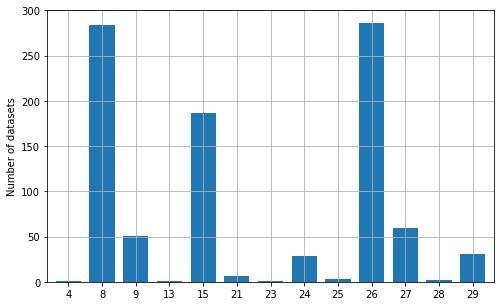

In [193]:
a = d2[d2['len'] == 1]['CSC flag']
b = a.apply(lambda x: int(x[0])).value_counts()
b.sort_index(inplace=True)
p = b.plot.bar(
            figsize=[8 ,5],
            width=0.75, grid=True, rot=0,
            ylabel="Number of datasets")

In [174]:
b.sort_index(inplace=True)
b

4.0       1
8.0     284
9.0      51
13.0      1
15.0    187
21.0      6
23.0      1
24.0     29
25.0      3
26.0    286
27.0     59
28.0      2
29.0     31
Name: CSC flag, dtype: int64

In [126]:
from pandas.core.common import flatten
l = [[1,2,3], [4,5], [6]]
list(flatten(l))

[1, 2, 3, 4, 5, 6]